In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:/Data Science/Symbiosis/XGBoost/sonar.all-data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
df.shape

(208, 61)

In [8]:
x=df.drop(columns=[60])
y=df[60]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

DT=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
GNB=GaussianNB()
BaggingClassifier=BaggingClassifier()
RandomForest=RandomForestClassifier()
AdaBoostClassifier=AdaBoostClassifier()
GradientBoostingClassifier=GradientBoostingClassifier()
XGBoost=XGBClassifier()

models={"Logistic":lr,"KNN":knn,"SVM":svm,"GaussianNB":GNB,"DecisionTreeClassifier":DT,"BaggingClassifier":BaggingClassifier,
       "RandomForest":RandomForest,"AdaBoostClassifier":AdaBoostClassifier,
        "GradientBoostingClassifier":GradientBoostingClassifier,"XGBoost":XGBoost}

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=[]
for name,model in models.items():
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracy.append(acc)
    print("For ",name," ,Accuracy is :",acc)

For  Logistic  ,Accuracy is : 0.8333333333333334
For  KNN  ,Accuracy is : 0.7857142857142857
For  SVM  ,Accuracy is : 0.7857142857142857
For  GaussianNB  ,Accuracy is : 0.6666666666666666
For  DecisionTreeClassifier  ,Accuracy is : 0.7142857142857143
For  BaggingClassifier  ,Accuracy is : 0.8333333333333334
For  RandomForest  ,Accuracy is : 0.8809523809523809
For  AdaBoostClassifier  ,Accuracy is : 0.8809523809523809
For  GradientBoostingClassifier  ,Accuracy is : 0.8809523809523809
[14:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XGBoost  ,Accuracy is : 0.8809523809523809


Text(0, 0.5, 'Accuracy')

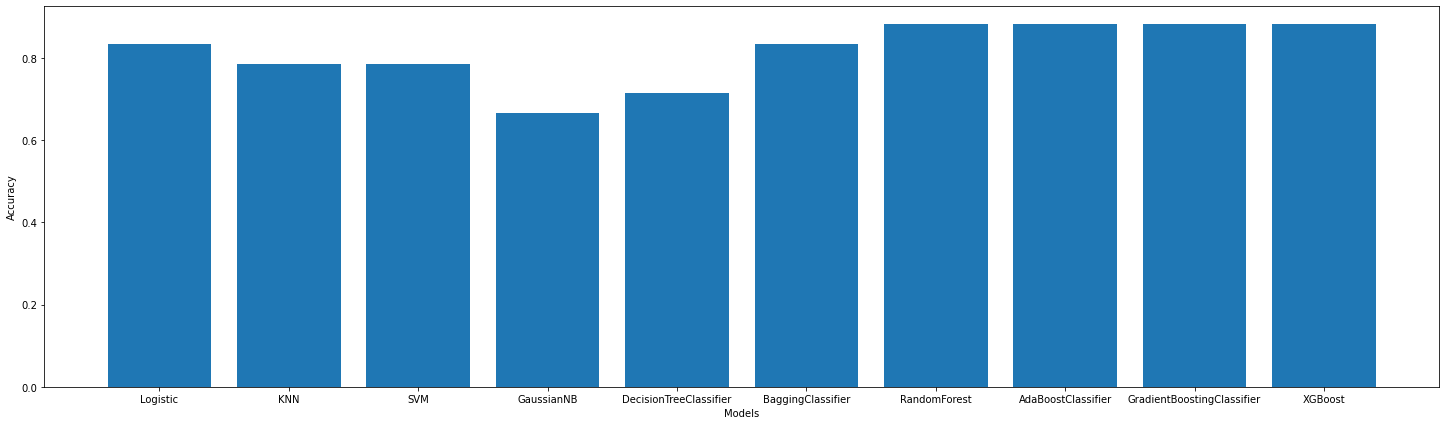

In [12]:
fig=plt.figure(figsize=(25,7))
plt.bar(models.keys(),accuracy)
plt.xlabel("Models")
plt.ylabel("Accuracy")

## Among the Classifier Random Forest has the highest accuracy of 88.09%, hence choosing Random forest

# Tuning HyperParameters of Random Forest

In [14]:
#tuning 
#parameter
max_features=["sqrt","log2"]
n_estimators=[5,10,100,1000]
grid={"max_features":max_features,"n_estimators":n_estimators}
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'max_features': 'log2', 'n_estimators': 1000}
0.8395833333333333


accuracy is : 0.9047619047619048
              precision    recall  f1-score   support

           M       0.84      1.00      0.91        21
           R       1.00      0.81      0.89        21

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



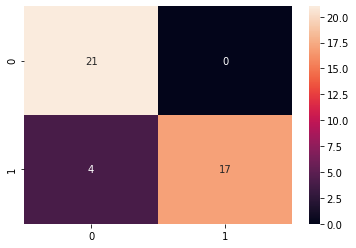

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000,max_features='log2')
#fitting data to Random Forest model
model.fit(xtrain,ytrain)
#testing on test dataset 
ypred=model.predict(xtest)
#Model Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy is :",accuracy_score(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))